<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/JM_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [3]:
df = pd.read_csv("JM_algo.csv")

exploratory

In [4]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Knowledge        270 non-null    int64  
 1   Problem Solving  270 non-null    int64  
 2   Interaction      270 non-null    int64  
 3   Impact           244 non-null    float64
 4   Accountability   270 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 10.7 KB


In [5]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,94,15,52,74.0,0
1,54,36,41,55.0,0
2,52,20,36,30.0,0
3,52,20,36,30.0,0
4,52,15,36,64.0,0


checks

In [6]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,270.000000,270.000000,270.000000,244.000000,270.000000
mean,87.555556,29.951852,46.044444,73.307377,14.788889
std,37.411540,16.300885,14.766770,28.501675,17.245329
min,52.000000,15.000000,27.000000,30.000000,0.000000
25%,52.000000,20.000000,36.000000,55.000000,0.000000
50%,82.000000,27.000000,41.000000,64.000000,0.000000
75%,118.000000,36.000000,52.000000,90.000000,30.000000
max,221.000000,87.000000,85.000000,168.000000,53.000000


In [7]:
X=df

Scaling

In [8]:
cols = X.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.248521,0.000000,0.431034,0.318841,0.0
1,0.011834,0.291667,0.241379,0.181159,0.0
2,0.000000,0.069444,0.155172,0.000000,0.0
3,0.000000,0.069444,0.155172,0.000000,0.0
4,0.000000,0.000000,0.155172,0.246377,0.0


In [12]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.248521,0.000000,0.431034,0.318841,0.000000
1,0.011834,0.291667,0.241379,0.181159,0.000000
2,0.000000,0.069444,0.155172,0.000000,0.000000
3,0.000000,0.069444,0.155172,0.000000,0.000000
4,0.000000,0.000000,0.155172,0.246377,0.000000
...,...,...,...,...,...
262,1.000000,0.694444,0.672414,0.623188,0.754717
263,1.000000,0.694444,0.672414,0.623188,0.660377
264,0.568047,0.458333,0.672414,0.623188,0.396226
265,0.136095,1.000000,0.155172,1.000000,0.396226


K means

In [13]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [14]:
kmeans.cluster_centers_

array([[0.15735584, 0.13126362, 0.2918357 , 0.2387397 , 0.17221606],
       [0.52810651, 0.40555556, 0.68577586, 0.69673913, 0.60330189]])

inertia

In [15]:
kmeans.inertia_

44.465197408729686

Elbow

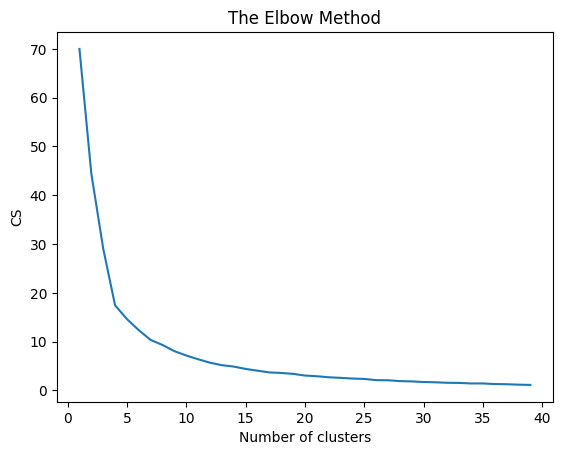

In [16]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

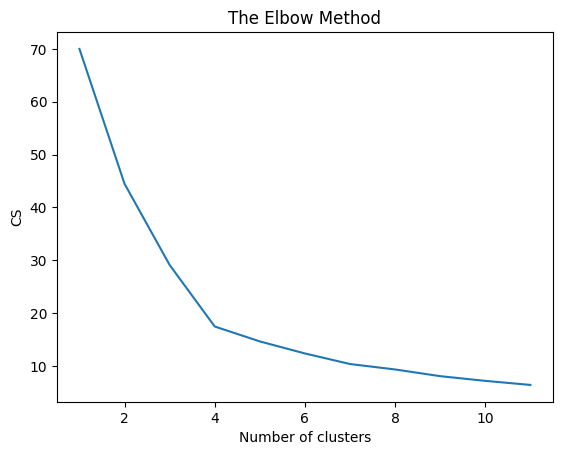

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [19]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_algo_l.csv')
print(labels)

[2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 2 0 0 2 2 2 2 0 2 0 0 0 2 0 3 2 2 2 0 2
 2 2 2 0 0 3 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 3 3 2 2 2 2 2 0 0 2
 0 0 0 2 0 2 0 0 2 0 0 2 0 2 0 2 2 2 2 2 3 3 0 2 2 2 2 2 2 2 0 0 0 0 0 2 2
 0 1 2 0 0 1 0 0 1 2 2 2 2 3 3 0 0 0 0 0 3 1 1 3 1 1 1 1 1 1 1 1 3 3 1 3 2
 1 1 3 3 3 3 3 3 0 3 1 3 3 1 3 3 3 3 3 3 3 3 0 0 0 0 2 2 2 0 0 0 0 0 1 1 3
 3 3 3 1 1 1 1 2 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 2 3
 1 1 1 1 2 2 1 0 0 3 1 3 0 0 1 1 1 1 1 1 1 1]


In [20]:
Z=kmeans.cluster_centers_
Z

array([[7.41617357e-03, 7.24074074e-02, 1.25287356e-01, 2.09951691e-01,
        1.66533454e-16],
       [5.36033986e-01, 4.04202279e-01, 6.77718833e-01, 6.98625046e-01,
        6.18771166e-01],
       [3.54686562e-01, 2.88043478e-01, 5.22488756e-01, 2.62654904e-01,
        1.66533454e-16],
       [1.19507227e-01, 3.16484517e-02, 2.47314867e-01, 2.53385602e-01,
        5.75935663e-01]])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 244 samples in 0.001s...
[t-SNE] Computed neighbors for 244 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 244 / 244
[t-SNE] Mean sigma: 0.312101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.039490
[t-SNE] KL divergence after 5000 iterations: -1.039003


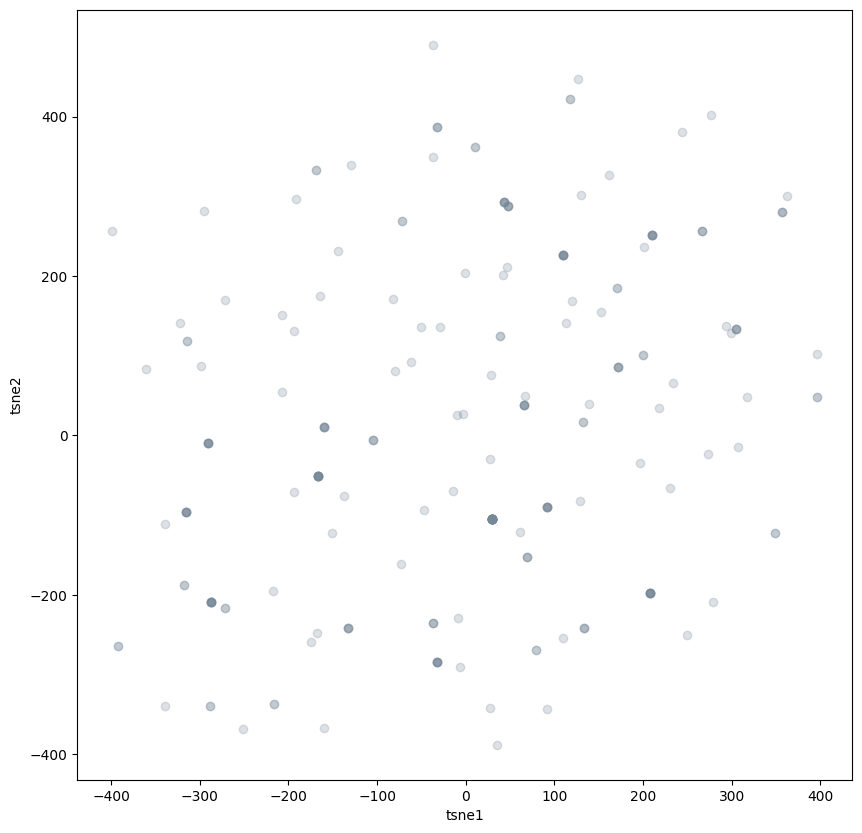

In [21]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [22]:
import matplotlib

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 244 samples in 0.001s...
[t-SNE] Computed neighbors for 244 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 244 / 244
[t-SNE] Mean sigma: 0.312101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.151749
[t-SNE] KL divergence after 2500 iterations: -1.035102


In [24]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

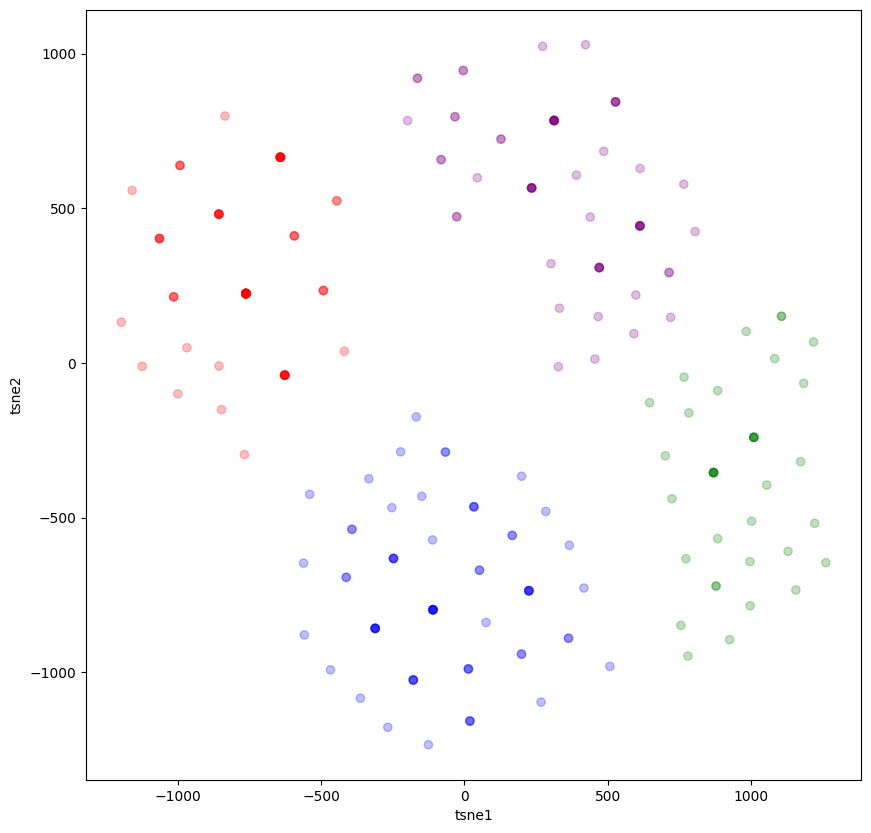

In [25]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [26]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_algo.csv')
Z2

array([[5.32533333e+01, 2.02133333e+01, 3.42666667e+01, 5.89733333e+01,
        8.82627305e-15],
       [1.42589744e+02, 4.41025641e+01, 6.63076923e+01, 1.26410256e+02,
        3.27948718e+01],
       [1.11942029e+02, 3.57391304e+01, 5.73043478e+01, 6.62463768e+01,
        8.82627305e-15],
       [7.21967213e+01, 1.72786885e+01, 4.13442623e+01, 6.49672131e+01,
        3.05245902e+01]])

In [33]:
P = pd.read_csv("tr.csv")
P = ms.fit_transform(P)
P2=kmeans.predict(P)
P2

array([1, 3, 2], dtype=int32)